G27
Dave Brunner

In [3]:
import numpy as np
import torch
import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

### Utilities

The test function that is used for illustrating the workings of the optimisers.

In [4]:
def test_function(x):
    return x[0] ** 2 / 15.0 + x[1] ** 2

Utility for plotting the contours of a given function`f` in a range `r` (4-tuple) and 20 levels up to a max level given by `s`. 

In [5]:
def plot_contours(r, s, f):
    matplotlib.rcParams['xtick.direction'] = 'out'
    matplotlib.rcParams['ytick.direction'] = 'out'
    delta = 0.01
    X = np.arange(r[0], r[1], delta)
    Y = np.arange(r[2], r[3], delta)
    X, Y = np.meshgrid(X, Y)
    XX = np.stack((X, Y), axis=0)
    Z = f(XX)
    V = np.arange(0.2, s, s / 20) ** 2
    #CS = plt.contour(X, Y, Z, V, colors=colors)
    #plt.clabel(CS, inline=1, fontsize=10)
    CS = plt.contour(X, Y, Z, V)

Optimisation (i.e. minimisation) of the function `f` starting at `x` (pytorch tensor), by using the given `optimizer` over`nepochs`epochs.  

In [6]:
def optimize(f, x, nepochs, optimizer):
    params = [x, ]
    xhist = [x[0].item()]
    yhist = [x[1].item()]
    optimizer.param_groups[0]['params'] = params
    for i in range(nepochs):
        y = f(x)
        optimizer.zero_grad()
        y.backward()
        optimizer.step()
        xhist.append(x[0].item())
        yhist.append(x[1].item())
    return xhist, yhist

RMS error for measuring the discrepancy to the final target (for the test function above it is (0,0). 

In [7]:
def error(xhist, yhist):
    x, y = xhist[-1], yhist[-1]
    return "%6.3f, (%6.3f, %6.3f)" % (np.sqrt(x ** 2 + y ** 2), x, y)

### Sample Run

SGD - lr=0.3   1.326, (-1.326, -0.000)


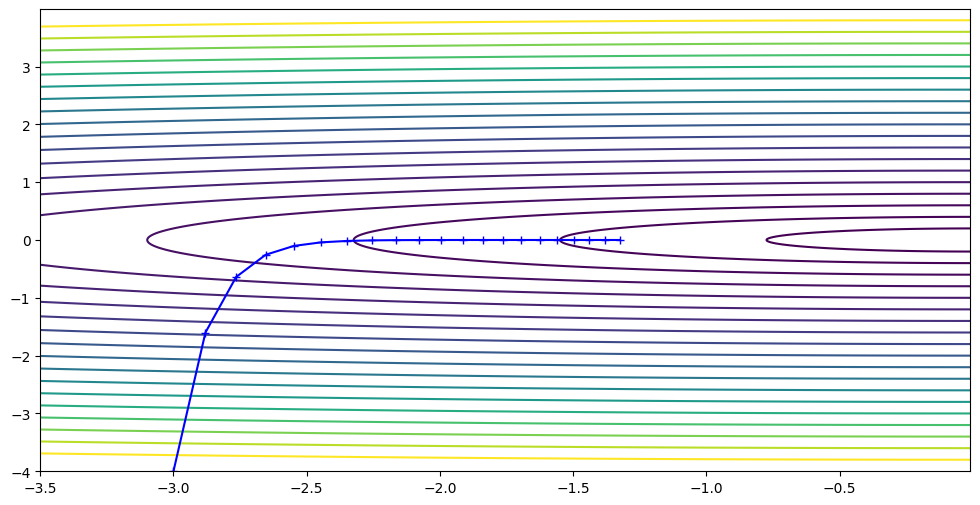

In [8]:
nepochs = 20

plt.figure(1, figsize=(12, 6))
plot_contours([-3.5, 0., -4., 4.], 4., test_function)

# initial value
x = torch.tensor([-3.0, -4.0]).requires_grad_()

optimizer = torch.optim.SGD([x], lr=.3)
xhist, yhist = optimize(test_function, x, nepochs, optimizer)

plt.plot(xhist, yhist, "b-+", label="lr=0.3")
print("SGD - lr=0.3 ", error(xhist, yhist))


### Tasks 

For better comparison, always use the same (non-optimal) initial point (-3,-4).

* Study SGD for different learning rates. Illustrate the behavior as learned and analysed in week 02.
* Compare Momentum for different momentum parameters ($\beta_1$) and characterise how the optimisation paths qualitatively change.
* Can you spot a difference with / without Nesterov?
* Compare RMSProp for different parameters $\beta_2$ and characterise how the optimisation paths qualitatively change.
* Finally, check different settings for Adam. Identify your best parameters that allows you to get closest the minimum in 25 epochs and with an error of at max 1.0e-3?


In [9]:
colors = ['red', 'orange', 'green', 'blue', 'yellow', 'brown']

SGD - lr=0.001   4.870, (-2.992, -3.843)
SGD - lr=0.01   3.958, (-2.921, -2.670)
SGD - lr=0.1   2.294, (-2.294, -0.046)
SGD - lr=0.7   0.423, (-0.423, -0.000)
SGD - lr=0.9   0.237, (-0.233, -0.046)
SGD - lr=1   4.004, (-0.171, -4.000)


Text(0.5, 1.0, 'SGD with different learning rates')

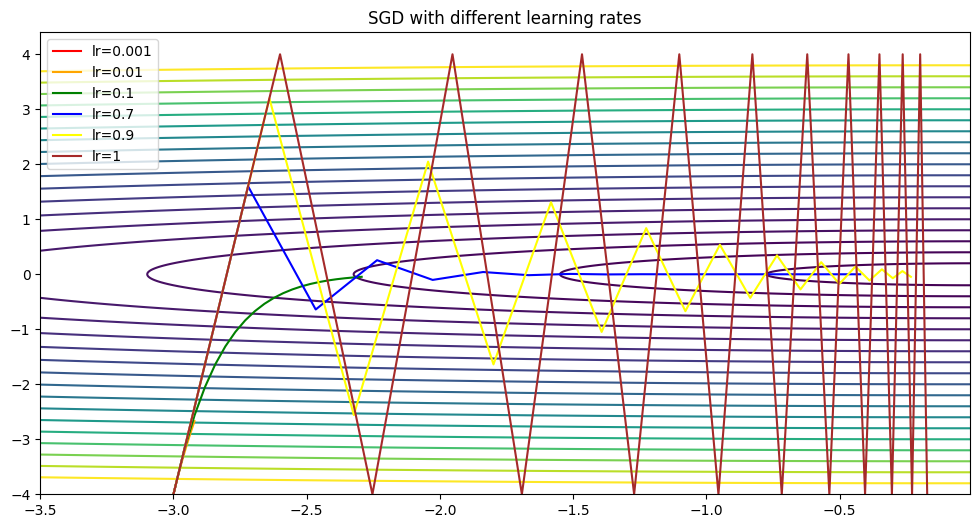

In [43]:
nepochs = 20

plt.figure(1, figsize=(12, 6))
plot_contours([-3.5, 0., -4., 4.], 4., test_function)

lrs = [0.001, 0.01, 0.1, 0.7, 0.9, 1]

for lr, color in zip(lrs, colors):
    x = torch.tensor([-3.0, -4.0]).requires_grad_()
    optimizer = torch.optim.SGD([x], lr=lr)
    xhist, yhist = optimize(test_function, x, nepochs, optimizer)
    plt.plot(xhist, yhist, color=f'{color}', linestyle='-', label=f"lr={lr}")
    print(f"SGD - lr={lr} ", error(xhist, yhist))
plt.legend()
plt.title("SGD with different learning rates")

I see with the learning rate of 0.9 the error is the smallest in the end.
The higher the learning rate the more the path is zigzagging.

SGD - m=0   1.326, (-1.326, -0.000)
SGD - m=0.2   1.076, (-1.076,  0.000)
SGD - m=0.4   0.742, (-0.742, -0.000)
SGD - m=0.65   0.144, (-0.144, -0.009)
SGD - m=0.7   0.009, ( 0.009, -0.003)


Text(0.5, 1.0, 'SGD with different momentum and without Nesterov')

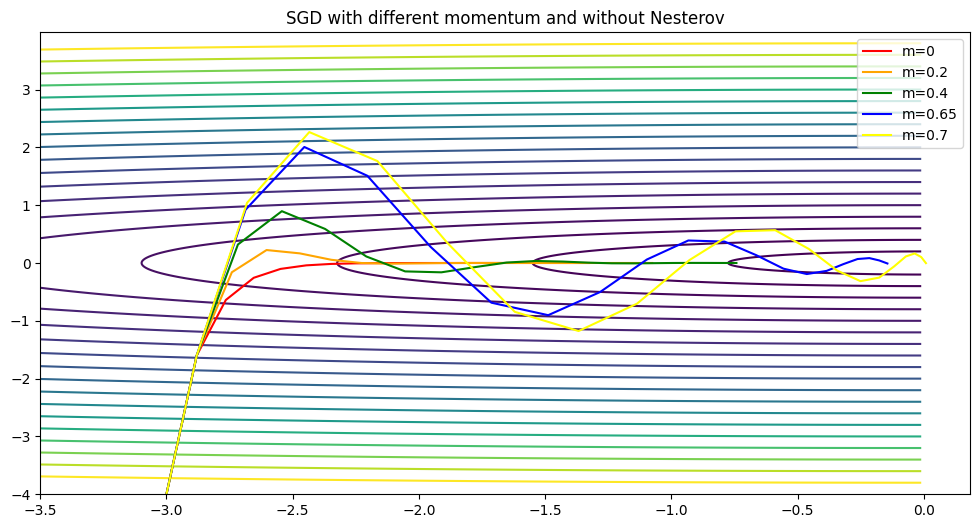

In [45]:
nepochs = 20

plt.figure(1, figsize=(12, 6))
plot_contours([-3.5, 0., -4., 4.], 4., test_function)

momentums = [0, 0.2, 0.4, 0.65, 0.7]

for momentum, color in zip(momentums, colors):
    x = torch.tensor([-3.0, -4.0]).requires_grad_()
    optimizer = torch.optim.SGD([x], lr=.3, momentum=momentum)
    xhist, yhist = optimize(test_function, x, nepochs, optimizer)
    plt.plot(xhist, yhist, color=f'{color}', linestyle='-', label=f"m={momentum}")
    print(f"SGD - m={momentum} ", error(xhist, yhist))
plt.legend()
plt.title("SGD with different momentum and without Nesterov")

I see that the higher the momentum the more the path is making waves.
A momentum of 0.7 the error is the smallest in the end.

SGD - m=0.2   1.075, (-1.075,  0.000)
SGD - m=0.4   0.750, (-0.750,  0.000)
SGD - m=0.65   0.194, (-0.194, -0.000)
SGD - m=0.7   0.059, (-0.059, -0.000)


Text(0.5, 1.0, 'SGD with different momentum and with Nesterov')

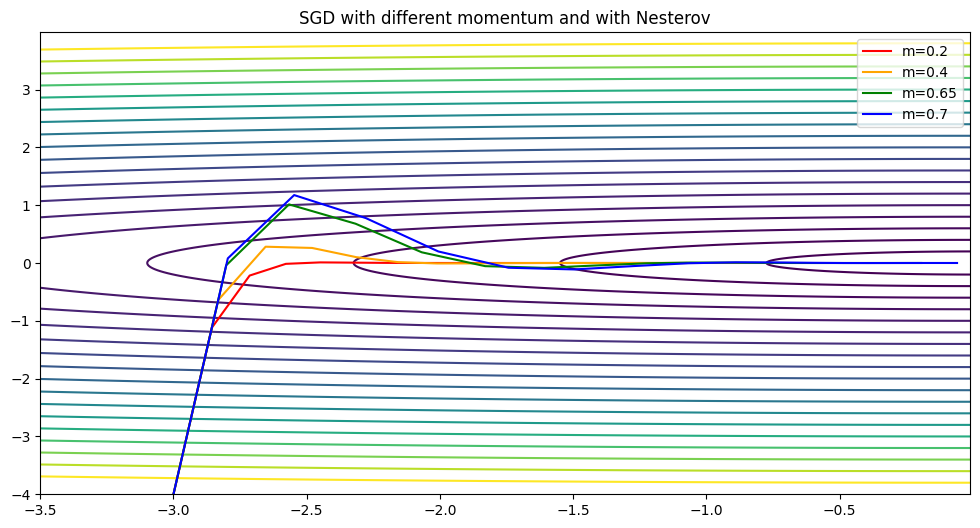

In [48]:
nepochs = 20

plt.figure(1, figsize=(12, 6))
plot_contours([-3.5, 0., -4., 4.], 4., test_function)

momentums = [0.2, 0.4, 0.65, 0.7]

for momentum, color in zip(momentums, colors):
    x = torch.tensor([-3.0, -4.0]).requires_grad_()
    optimizer = torch.optim.SGD([x], lr=.3, momentum=momentum, nesterov=True)
    xhist, yhist = optimize(test_function, x, nepochs, optimizer)
    plt.plot(xhist, yhist, color=f'{color}', linestyle='-', label=f"m={momentum}")
    print(f"SGD - m={momentum} ", error(xhist, yhist))
plt.legend()
plt.title("SGD with different momentum and with Nesterov")

With the Nesterov the path is more straight and the error is quite similar.

SGD - lr=0.1, alpha={par[0]}, momentum={par[1]}  0.065, (-0.003, -0.065)
SGD - lr=0.1, alpha={par[0]}, momentum={par[1]}  0.409, ( 0.040, -0.407)
SGD - lr=0.1, alpha={par[0]}, momentum={par[1]}  0.238, (-0.005, -0.238)


Text(0.5, 1.0, 'RMSProb with different parameters')

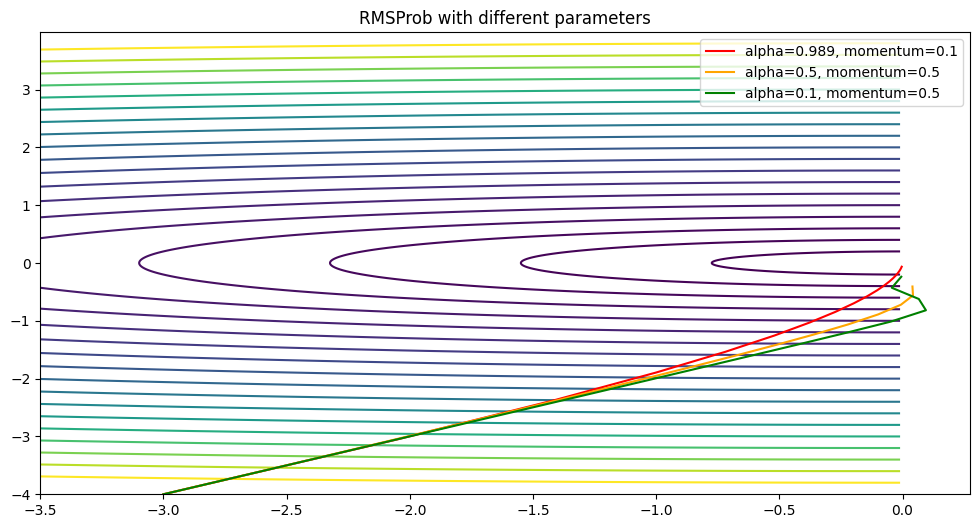

In [70]:
nepochs = 20

plt.figure(1, figsize=(12, 6))
plot_contours([-3.5, 0., -4., 4.], 4., test_function)

#  alpha, momentum
params = [(0.989, 0.1), (0.5, 0.5), (0.1, 0.5)]
for par, color in zip(params, colors):
    x = torch.tensor([-3.0, -4.0]).requires_grad_()
    optimizer = torch.optim.RMSprop([x], lr=0.1, alpha=par[0], momentum=par[1])
    xhist, yhist = optimize(test_function, x, nepochs, optimizer)
    plt.plot(xhist, yhist, color=f'{color}', linestyle='-', label=f"alpha={par[0]}, momentum={par[1]}")
    print("SGD - lr=0.1, alpha={par[0]}, momentum={par[1]}", error(xhist, yhist))
plt.legend()
plt.title("RMSProb with different parameters")

With an alpha of 0.989 the error is the smallest in the end.

SGD - lr=(0.18, 0.61, 0.806), betas=((0.61, 0.806))   0.271, ( 0.052, -0.266)
SGD - lr=(0.01, 0.6, 0.8), betas=((0.6, 0.8))   4.652, (-2.751, -3.751)


Text(0.5, 1.0, 'Adam with different learning rates')

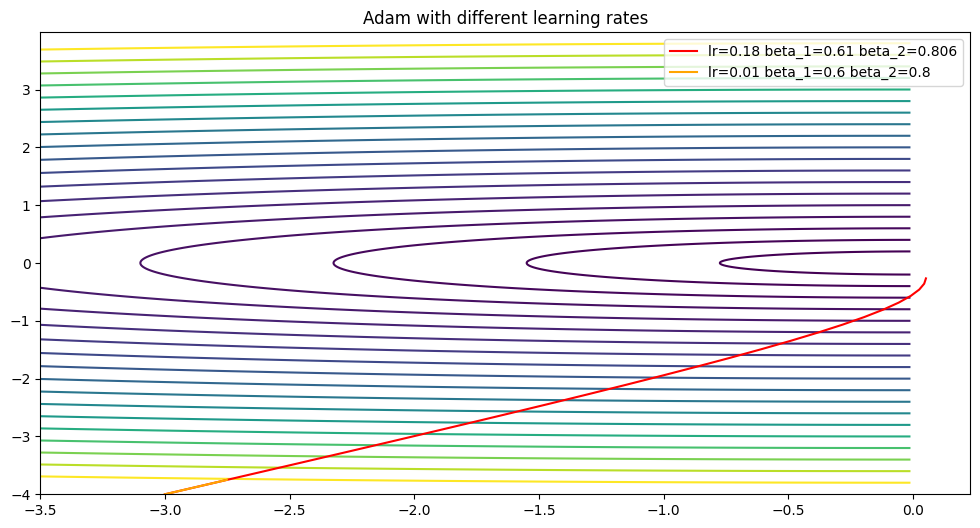

In [86]:
nepochs = 25

plt.figure(1, figsize=(12, 6))
plot_contours([-3.5, 0., -4., 4.], 4., test_function)

#  lr, betas
params = [(0.18, 0.61, 0.806),(0.01,0.6,0.8)] #, (0.9, 0.999), 1e-8, 0]

for par, color in zip(params, colors):
    x = torch.tensor([-3.0, -4.0]).requires_grad_()
    optimizer = torch.optim.Adam([x], lr=par[0], betas=(par[1],par[2]))
    xhist, yhist = optimize(test_function, x, nepochs, optimizer)
    plt.plot(xhist, yhist, color=f'{color}', linestyle='-',
             label=f"lr={par[0]} beta_1={par[1]} beta_2={par[2]}")
    print(f"SGD - lr={par}, betas=({par[1],par[2]}) ", error(xhist, yhist))
plt.legend()
plt.title("Adam with different learning rates")

Adam - beta_1= 0.61   beta_2= 0.81  0.001, ( 0.001,  0.001)


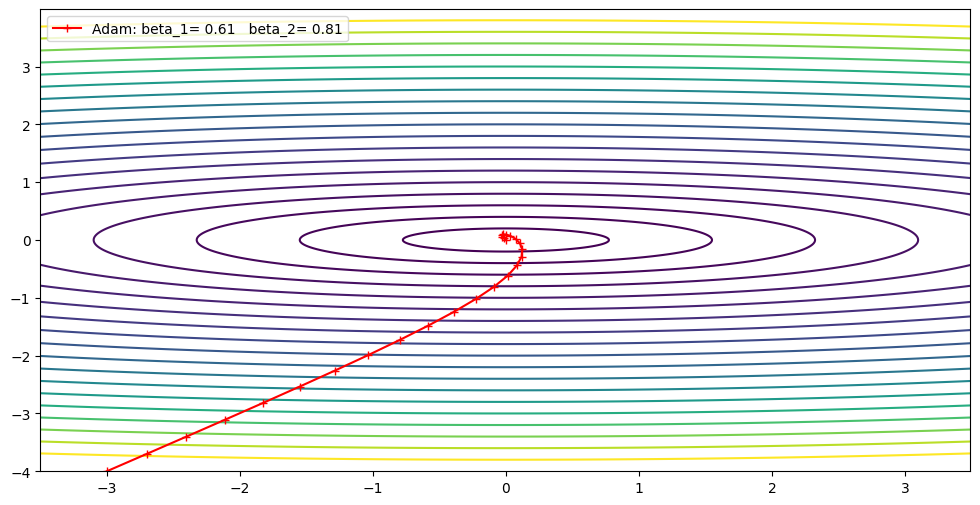

In [72]:
nepochs = 25
lr = 0.299

# Create plot
plt.figure(1,figsize=(12,6))
plot_contours([-3.5,3.5,-4.,4.], 4., test_function)
